# Alliance Auth Releases

This workbook provides analytics related to releases for the Alliance Auth project.

We are using live data fetched for the Alliance Auth project from PyPI. The source data is the list of merged merge request from 2018 (Release 2) until today.


In [13]:
"""imports & constants"""
import requests
import pandas as pd
import datetime as dt


In [14]:
"""Fetch data from PyPI and create dataframe"""
r = requests.get("https://pypi.org/pypi/allianceauth/json")
r.raise_for_status()
data = r.json()


In [15]:
"""Create dataframe from raw data."""
releases_raw = {
    key: obj[0]["upload_time_iso_8601"] for key, obj in data["releases"].items()
}
released_at = pd.to_datetime(pd.Series(releases_raw)).sort_values(ascending=True)


In [16]:
"""Generate chart for the release frequency."""
duration_days = released_at.diff(periods=1).dt.days.rename("duration").round()
releases = released_at.to_frame(name="released at")
releases["duration"] = duration_days
releases["year"] = releases["released at"].dt.year.astype("str")

mean_duration = releases.groupby("year")["duration"].mean().astype("int64")
releases_count = releases.groupby("year")["released at"].count().rename("count")
releases_per_year = mean_duration.to_frame().join(releases_count)

ax = releases_per_year.plot.bar(y="count", ylabel="release count", figsize=(8, 5))
releases_per_year.plot(
    y="duration", c="k", ax=ax, use_index=False, secondary_y=True, mark_right=False
)
ax.right_ax.set_ylabel("avg. days between releases")
ax.set_title("Release frequency per year")
fig = ax.get_figure()
fig.patch.set_facecolor("white")
fig.show()


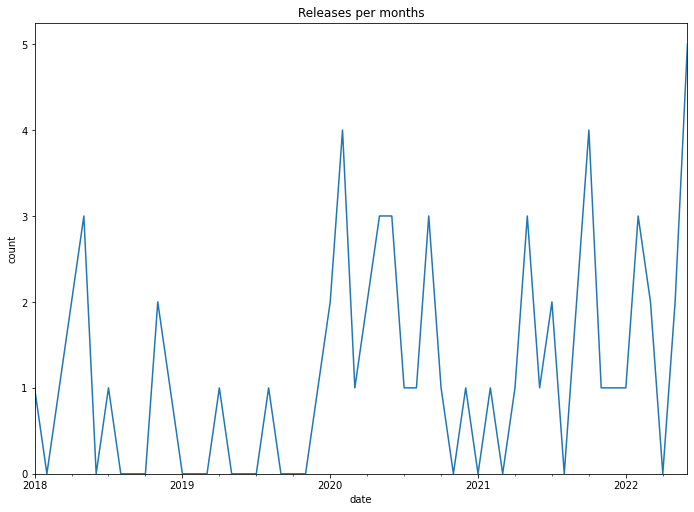

In [40]:
"""Generate chart showing number of release over time"""
series = released_at.rename("dummy").reset_index()["dummy"]
series2 = pd.Series(series.index, index=series).resample("1M").count()
ax = series2.plot(
    xlabel="date",
    ylabel="count",
    title="Releases per months",
    figsize=(11.7, 8.3),
    ylim=0,
)
fig = ax.get_figure()
fig.patch.set_facecolor("white")
fig.show()
